<a href="https://colab.research.google.com/github/JapiKredi/MultiModel_RAG_for_Videoprocessing/blob/main/Copy_of_Multmodel_RAG_System_for_video_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. llamaindex framework
2. Lancedb
3. LLM model(GPT-4V)
4. GEMINI-PRO-VISION

Steps:
1. Download video from YouTube, process and store it.

2. Build Multi-Modal index and vector store for both texts and images.

3. Retrieve relevant images and context, use both to augment the prompt.

4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [1]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.1/136.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.3/268.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.1 MB/s eta 0:00:00


In [2]:
#%pip install llama-index-multi-modal-llms-openai
#%pip install llama-index-vector-stores-lancedb
%pip install llama-index-embeddings-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1

In [1]:
%pip install llama_index ftfy regex tqdm
%pip install -U openai-whisper
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-c4yw5ayg
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-c4yw5ayg
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 24.4 MB/s eta 0:00:00


In [2]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint

In [3]:
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')

In [4]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
import os
os.getcwd()

'/content'

In [7]:
video_url="https://youtu.be/3dhcmeOTZ_Q"
output_video_path = "/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [8]:
filepath=output_video_path + "input_vid.mp4"

In [9]:
filepath

'/content/video_data/input_vid.mp4'

In [21]:
filepath = output_video_path + "input_vid.mp4"
Path(output_folder).mkdir(parents=True, exist_ok=True)

In [22]:
Path(filepath).mkdir(parents=True,exist_ok=True)

In [12]:
import matplotlib.pyplot as plt

In [13]:
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

In [14]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
  return metadata

In [15]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_flder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [16]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)


In [17]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [18]:
video_url

'https://youtu.be/3dhcmeOTZ_Q'

In [24]:
output_video_path = '/content/video_data/input_vid.mp4'

In [25]:
metadata_vid = download_video(video_url, output_video_path)

In [26]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 7121}

In [27]:
filepath

'/content/video_data/input_vid.mp4'

In [28]:
output_folder

'/content/mixed_data/'

In [ ]:
!mkdir mixed_data

In [ ]:
filepath

In [ ]:
output_folder

In [30]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [31]:
filepath

'/content/video_data/input_vid.mp4'

In [32]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [33]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [ ]:
output_audio_path

In [34]:
text_data=audio_to_text(output_audio_path)

100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 162MiB/s]


In [35]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [36]:
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()

Text data saved to file


In [37]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


# Embedding lance db
# LLM

In [38]:
# embedding lance db
# llm

In [39]:
!pip install llama-index-readers-file

In [40]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [41]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [42]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [43]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [44]:
output_folder

'/content/mixed_data/'

In [45]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [46]:
documents

[ImageDocument(id_='da92e21d-020b-422f-863c-60fd9ecf528b', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 2759, 'creation_date': '2024-04-14', 'last_modified_date': '2024-04-14'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='ad675e42-dae6-44bb-aead-86632ce3559f', embedding=None, metadata={'file_path': '/content/mixed_data/frame0001.png', 'file_name': 'frame0001.png', 'file

In [47]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 104MiB/s]


In [48]:
retriever_engine=index.as_retriever(imilarity_top_k=3, image_similarity_top_k=3)

# RAG

In [49]:
import json
metadata_str=json.dumps(metadata_vid)

In [50]:
qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [51]:
qa_tmpl_str2=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [52]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [53]:
query_str="what is multiple linear regression?"

In [54]:
retrieval_results=retriever_engine.retrieve(query_str)

In [55]:
retrieval_results

[NodeWithScore(node=TextNode(id_='2d97b645-ed94-45be-8c3b-6edbebfa27ea', embedding=[-0.011831889860332012, 0.0038376476150006056, -0.001850233180448413, -0.011338036507368088, -0.010082827880978584, 0.0011677560396492481, 0.0016093084122985601, 0.00849838275462389, -0.03259428218007088, -0.042553648352622986, -0.006865925621241331, 0.025419699028134346, -0.001395819941535592, 0.02853371575474739, 0.007867349311709404, -0.016804711893200874, 0.02399301342666149, 0.010727579705417156, 0.0436236634850502, -0.020138218998908997, -0.030728617683053017, 0.012943058274686337, -0.013231138698756695, -0.01629714109003544, -0.014417757280170918, -0.019520903006196022, 0.030344508588314056, -0.019685519859194756, 0.006968811620026827, -0.0025601466186344624, 0.012744145467877388, -0.006931086536496878, -0.009931928478181362, -0.019891291856765747, -0.010508089326322079, -0.02037142775952816, 0.011777017265558243, -0.001055438886396587, 0.023869551718235016, -0.01819024421274662, 0.021263105794787

In [56]:
retrieved_image=[]
retrieved_text=[]

In [57]:
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)

**Node ID:** 2d97b645-ed94-45be-8c3b-6edbebfa27ea<br>**Similarity:** 0.7483672499656677<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [58]:
retrieved_image

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0028.png']

In [59]:
retrieved_text

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [60]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [61]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 2d97b645-ed94-45be-8c3b-6edbebfa27ea<br>**Similarity:** 0.7483672499656677<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [62]:
output_folder

'/content/mixed_data/'

In [63]:
img

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0028.png']

In [64]:
image_documents = SimpleDirectoryReader(input_dir=output_folder, input_files=img).load_data()

In [72]:
image_documents2 = SimpleDirectoryReader(input_files=img).load_data()

In [65]:
context_str = "".join(txt)

In [66]:
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

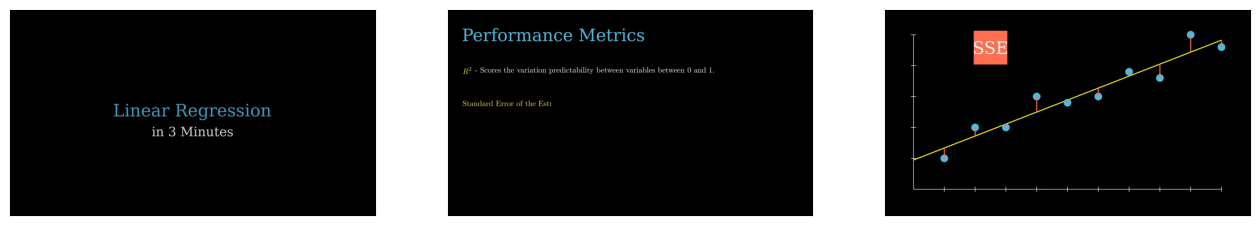

In [67]:
plot_images(img)

In [68]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [69]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500)

In [70]:
openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str,query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents,
)

CompletionResponse(text='Multiple linear regression is an extension of simple linear regression to model the relationship between one dependent variable and two or more independent variables. In multiple linear regression, the linear function that describes the relationship is expressed as:\n\ny = β0 + β1x1 + β2x2 + ... + βnxn + ε\n\nHere, y is the dependent variable, x1, x2, ..., xn are the independent variables, β0 is the intercept term (also known as the bias), β1, β2, ..., βn are the coefficients that represent the slopes of the relationship between each independent variable and the dependent variable, and ε is the error term.\n\nThe goal in multiple linear regression is to find the values of the coefficients (β0, β1, β2, ..., βn) that minimize the sum of the squared differences (residuals) between the observed values and the values predicted by the linear model. This is done by using techniques such as matrix decomposition or gradient descent to solve for the coefficients that res

In [73]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str2.format(
        query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents2,
)

In [74]:
pprint(result.text)

('Multiple linear regression is a statistical technique that models the '
 'relationship between two or more independent variables and a dependent '
 'variable by fitting a linear equation to observed data. Every value of the '
 'independent variable x is associated with a value of the dependent variable '
 'y. The regression line for p independent variables x1, x2, ..., xp is '
 'represented as:\n'
 '\n'
 'y = b0 + b1*x1 + b2*x2 + ... + bp*xp + e\n'
 '\n'
 'where y is the dependent variable, x1, x2, ..., xp are the independent '
 'variables, b0 is the y-intercept, b1, b2, ..., bp are the regression '
 'coefficients representing the change in the dependent variable for one unit '
 'change in the respective independent variable, and e is the error term, '
 'which is the part of y the regression model is unable to explain.\n'
 '\n'
 'Multiple linear regression is used to predict the value of a variable based '
 'on the value of two or more other variables. The model is "multiple" because

In [75]:
result2=openai_mm_llm.complete(
    prompt="what is O'Reilly?",
    image_documents=image_documents2
)
print(result2.text)

O'Reilly can refer to several things, but in the context of the images you've provided, which seem to be related to educational content on linear regression, O'Reilly likely refers to O'Reilly Media, Inc. This is a learning company that publishes books, produces tech conferences, and provides an online learning platform with content on various topics in technology, programming, and data science. They are known for their distinctive animal covers on their technical books. If the images are from a video or a book, it's possible that the content is part of O'Reilly's educational materials on data science and statistics.
